In [5]:
import pandas as pd
from pandas.plotting import parallel_coordinates
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import datetime
from itertools import cycle, islice

In [18]:
data = pd.read_csv('minuto.csv')

In [19]:
data.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [20]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rowID,1587257.0,793628.000000,458201.772449,0.00,396814.0,793628.00,1190442.00,1587256.00
air_pressure,1587257.0,916.830127,3.051593,905.00,914.8,916.70,918.70,929.50
air_temp,1587257.0,61.851440,11.833624,31.64,52.7,62.24,70.88,99.50
avg_wind_direction,1586824.0,161.965379,95.208120,0.00,62.0,182.00,217.00,359.00
avg_wind_speed,1586824.0,2.774272,2.060758,0.00,1.3,2.20,3.80,32.30
max_wind_direction,1586824.0,163.403048,92.367234,0.00,68.0,187.00,223.00,359.00
max_wind_speed,1586824.0,3.399813,2.423167,0.10,1.6,2.70,4.60,36.00
min_wind_direction,1586824.0,166.826371,97.462746,0.00,77.0,180.00,212.00,359.00
min_wind_speed,1586824.0,2.133130,1.745345,0.00,0.8,1.60,3.00,32.00
rain_accumulation,1587256.0,0.001855,0.960972,0.00,0.0,0.00,0.00,655.01


In [21]:
data[ data['rain_accumulation'] == 0  ].shape

(1577880, 13)

In [22]:
data[ data['rain_duration'] == 0  ].shape

(1572129, 13)

In [23]:
del data['rain_accumulation']
del data['rain_duration']

In [30]:
data_before = data

In [31]:
nuevo_data = data.dropna()

In [32]:
data_after = nuevo_data

In [33]:
data_before.shape[0] - data_after.shape[0]

433

In [34]:
nuevo_data.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity'],
      dtype='object')

In [35]:
features = [ 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed',
       'relative_humidity' ]

In [36]:
seleted_sample = nuevo_data[features]

In [37]:
seleted_sample.columns

Index(['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed',
       'max_wind_direction', 'max_wind_speed', 'relative_humidity'],
      dtype='object')

In [39]:
X = StandardScaler().fit_transform(seleted_sample)
X

array([[-1.4845918 ,  0.24548315, -0.68235146, ..., -0.62146568,
        -0.74275262,  0.49233814],
       [-1.4845918 ,  0.16942281, -0.01013968, ...,  0.55860684,
        -0.78402094, -0.29367075],
       [-1.4845918 ,  0.19984694, -0.89241765, ..., -0.22089061,
        -0.90782587, -0.17538786],
       ...,
       [-0.30484762,  1.08214687, -1.54362281, ..., -1.31435229,
        -0.45387443, -0.04947381],
       [-0.30484762,  1.08214687, -1.61714598, ..., -1.50922665,
        -0.49514275, -0.05328939],
       [-0.30484762,  1.08214687, -1.57513274, ..., -1.54170571,
        -0.49514275, -0.04947381]], shape=(1586824, 7))

In [40]:
kmeans = KMeans( n_clusters=12 )

In [41]:
model = kmeans.fit(X)

In [42]:
model

,n_clusters,12
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [43]:
centers = model.cluster_centers_
centers

array([[-0.17649417,  0.86516683, -1.31323652, -0.57126474, -1.17264176,
        -0.58665685, -0.63416079],
       [-0.84933711, -1.14909588,  0.37869487,  0.21628035,  0.47520429,
         0.20631682,  1.35165886],
       [ 0.24199119,  0.32235795,  1.88866862, -0.65177853, -1.5502075 ,
        -0.57534438, -0.30223236],
       [ 0.28681363,  0.77941362,  1.32542438, -0.65381701,  1.58933347,
        -0.6081389 , -0.75187485],
       [ 1.18821667, -0.24294863, -1.1563714 ,  2.06766224, -1.05558487,
         2.18799306, -1.13258542],
       [ 1.39072774, -0.09429683, -1.12724009, -0.14020565, -0.98653095,
        -0.1223341 , -0.97191238],
       [ 0.0285241 , -0.77531718, -1.18449415, -0.57295511, -1.03009127,
        -0.58775064,  0.88696337],
       [-0.31620093,  0.55927866,  0.16797902, -0.69258954,  0.3488503 ,
        -0.70487401, -0.37295046],
       [ 0.37592978, -0.96392834,  0.67569833, -0.54262031,  0.86948412,
        -0.5248711 ,  1.08302602],
       [-0.00543798,  0.7325

In [61]:
def pd_centers( featuresUsed, centers ):
    colNames = list( featuresUsed )
    colNames.append('Predictions')

    z = [ np.append(A, index) for index, A in enumerate(centers) ]

    p = pd.DataFrame(z, columns=colNames )
    p['Predictions'] =  p['Predictions'].astype(int)

    return p
    

In [68]:
def parallel_plot(data):
    my_colors = list( islice( cycle( [ 'b','r', 'g', 'y','k' ] ), None, len(data) ) )
    plt.style.use( "seaborn-v0_8-dark" )
    plt.figure( figsize=(15,8) ).gca().axes.set_ylim([-3, +3])
    parallel_coordinates(data, 'Predictions', color=my_colors, marker='o')

In [69]:
p =  pd_centers(features, centers)
p

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,Predictions
0,-0.176494,0.865167,-1.313237,-0.571265,-1.172642,-0.586657,-0.634161,0
1,-0.849337,-1.149096,0.378695,0.216280,0.475204,0.206317,1.351659,1
2,0.241991,0.322358,1.888669,-0.651779,-1.550208,-0.575344,-0.302232,2
3,0.286814,0.779414,1.325424,-0.653817,1.589333,-0.608139,-0.751875,3
4,1.188217,-0.242949,-1.156371,2.067662,-1.055585,2.187993,-1.132585,4
5,1.390728,-0.094297,-1.127240,-0.140206,-0.986531,-0.122334,-0.971912,5
6,0.028524,-0.775317,-1.184494,-0.572955,-1.030091,-0.587751,0.886963,6
7,-0.316201,0.559279,0.167979,-0.692590,0.348850,-0.704874,-0.372950,7
8,0.375930,-0.963928,0.675698,-0.542620,0.869484,-0.524871,1.083026,8
9,-0.005438,0.732514,0.418113,0.430692,0.532028,0.389846,-0.274023,9


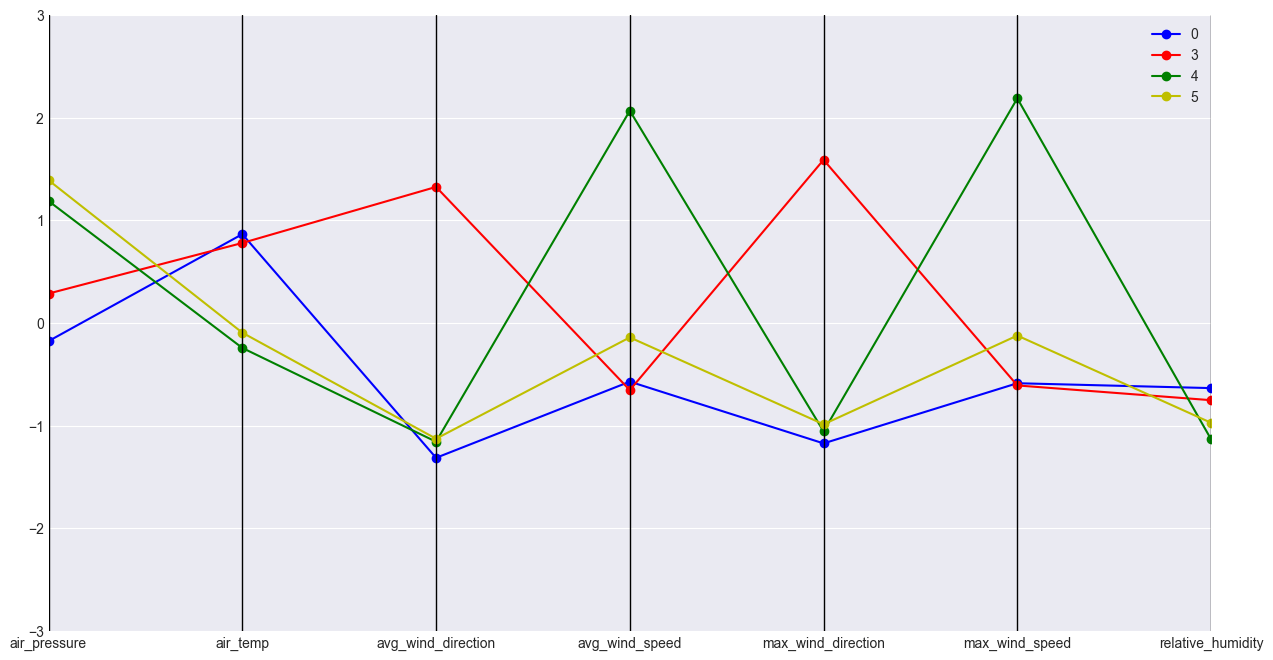

In [70]:
parallel_plot(p[p['relative_humidity'] < -0.5])

In [60]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

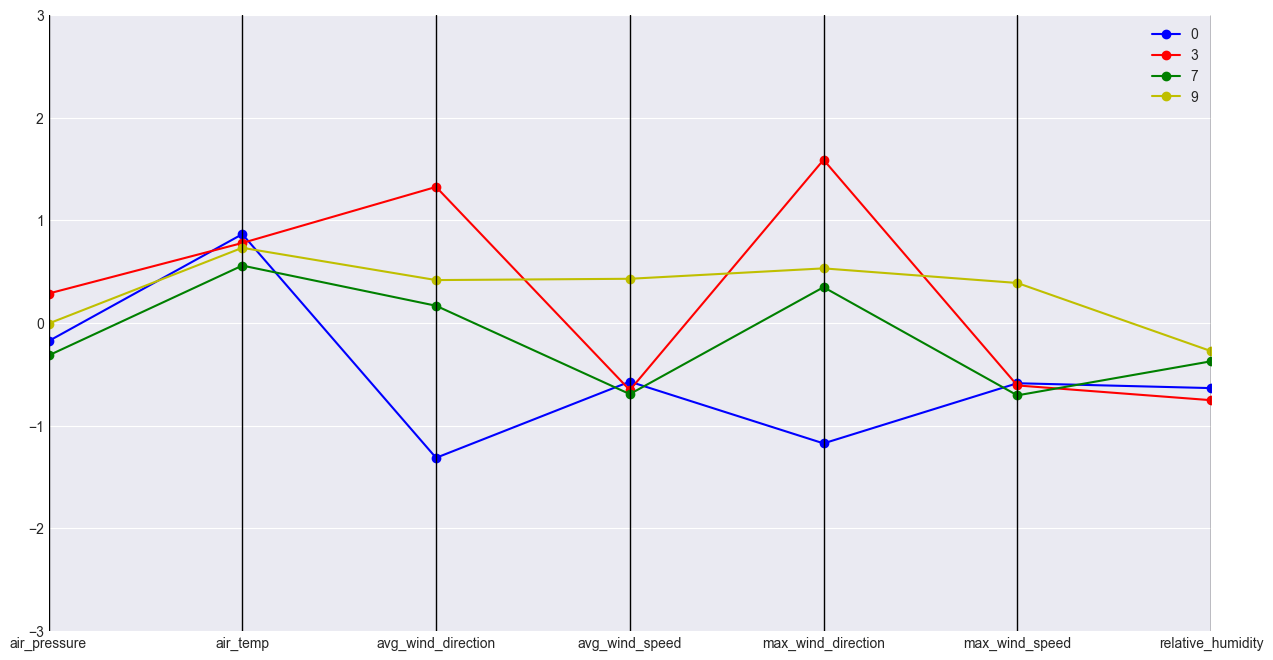

In [71]:
parallel_plot(p[p['air_temp'] > 0.5])

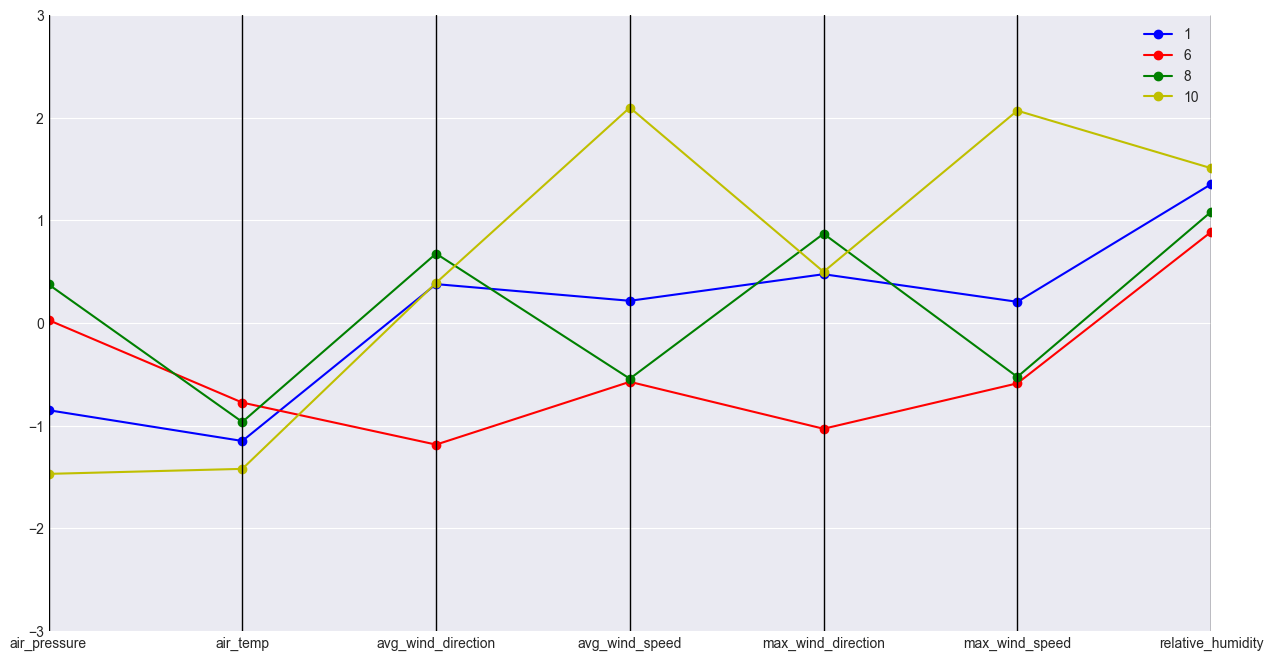

In [72]:
parallel_plot( p[ (p['relative_humidity'] > 0.5  ) & ( p['air_temp'] < 0.5 )]   )

In [ ]:
x
